<a href="https://colab.research.google.com/github/tanay47/Netflix-Movie-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Alright, let's start with our analysis.
###Let's start with importing relevant libraries.

###Dependencies  first

In [1]:
# importing all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV    
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords

from collections import Counter 
from wordcloud import WordCloud
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting notebook to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load and store dataset to a varible.
net_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING - Tanay Tupe/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


###Our data is mounted and ready to be operated. Let's check basic information of our dataset first.

In [5]:
# checking shape of dataset
net_df.size

93444

In [6]:
# checking shape of dataset
net_df.shape

(7787, 12)

In [7]:
# check all columns.
net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# basic information of dataset
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### So, we have total of "7787" observations and "12" columns. Also, we have few null values in our dataset. Particularly in "director", "cast", "date_added" etc.

In [9]:
net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


###Check for duplicate observations

In [10]:
# check for duplicated observations.
len(net_df[net_df.duplicated()])

0

### Great, we also don't have any duplicate observations as well.

# Exploratory Data Analysis.

###Let's dig into dataset even more and find answers to some questions using EDA.








###Which content type is Netflix more focused on.

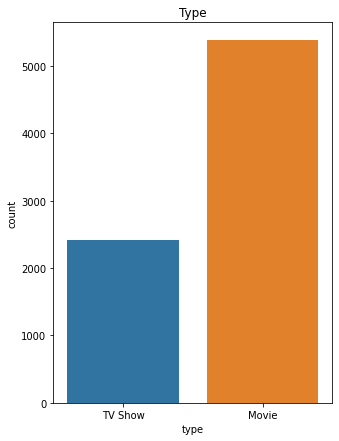

In [11]:
# plotting a countplot of TV Series and Movies form "type" feature.
plt.figure(figsize = (5,7))
sns.countplot(net_df['type'])
fig = plt.gcf()
plt.title('Type')
plt.show()

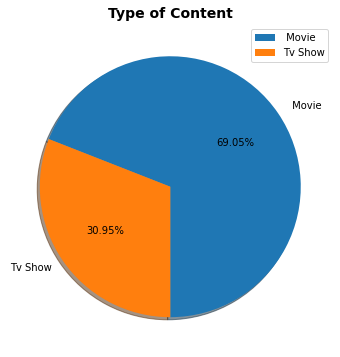

In [12]:
# plotting pie chart for 
plt.figure(figsize=(6,6))
labels = [" Movie",'Tv Show']
values = net_df['type'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270)
plt.title('Type of Content',
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### It's clear that, Netflix focuses on movies more than TV Shows.

### Let's understanding what type content is available in different countries.

In [13]:
# grouping net_df on country having no of counting more than 90.
grouped_country = pd.DataFrame(net_df.groupby("country").size() > 90)
grouped_country

,0
country,
Argentina,False
"Argentina, Brazil, France, Poland, Germany, Denmark",False
"Argentina, Chile",False
"Argentina, Chile, Peru",False
"Argentina, France",False
...,...
Venezuela,False
"Venezuela, Colombia",False
Vietnam,False


In [14]:
# storing top countries
top_countries = grouped_country[ net_df.groupby('country').size() > 90]
top_countries.reset_index(inplace=True)
top_countries

,country,0
0,Canada,True
1,Egypt,True
2,France,True
3,India,True
4,Japan,True
5,Mexico,True
6,South Korea,True
7,Spain,True
8,Turkey,True
9,United Kingdom,True


In [15]:
# merging "country" and "listed_in" to above dataframe using left join
top_countries = top_countries.merge(net_df[["country", "listed_in"]], on='country', how='left')

In [16]:
# list of top countries
list_of_top_countries = list(top_countries.country.unique())
list_of_top_countries

['Canada',
 'Egypt',
 'France',
 'India',
 'Japan',
 'Mexico',
 'South Korea',
 'Spain',
 'Turkey',
 'United Kingdom',
 'United States']

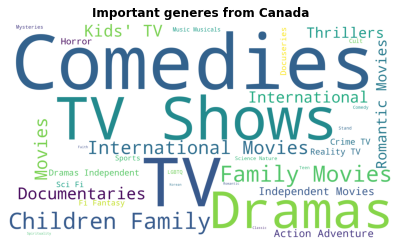

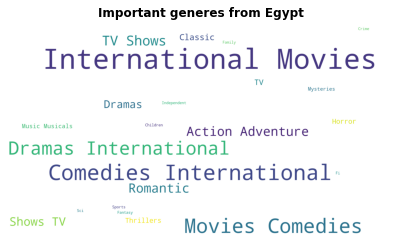

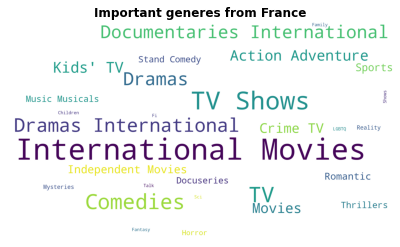

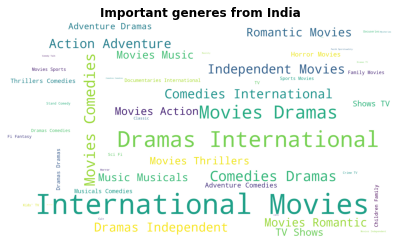

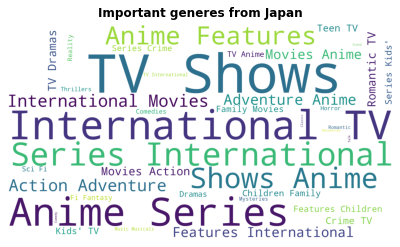

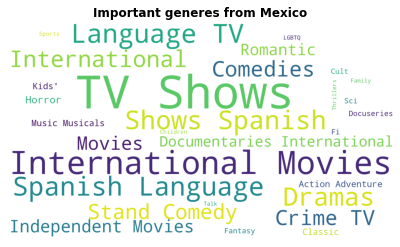

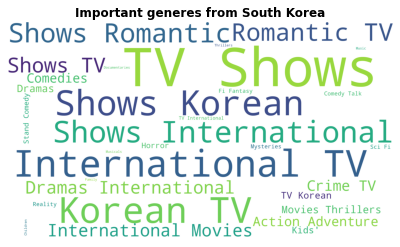

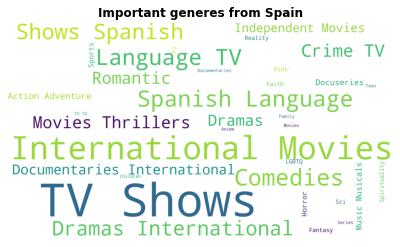

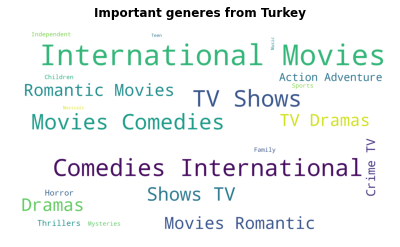

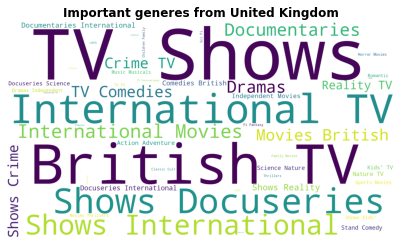

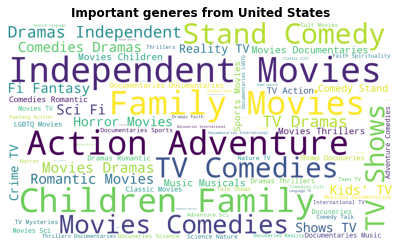

In [17]:
# using wordcloud to visually display most viewed content with respect to country
for country in list_of_top_countries:
  country_sub_df = top_countries[ top_countries['country'] == country ]
  
  plt.subplots(figsize=(7,4))
  wordcloud = WordCloud(
                            background_color='white',
                            width=1920,
                            height=1080
                          ).generate(" ".join(country_sub_df.listed_in))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.savefig('category.png')
  plt.title(f'Important generes from {country}', fontweight="bold")
  plt.show()

###Next, we find most occurred topics in all records

In [18]:
def top_words_counter(document):
  " function to count top 20 words from given document. returns a tuple with word and it's value "
  return Counter(" ".join(document).split()).most_common(20)

In [19]:
top_words = pd.DataFrame(top_words_counter(net_df['listed_in']))

Text(0.5, 1.0, 'Top words occurred in listed_in feature')

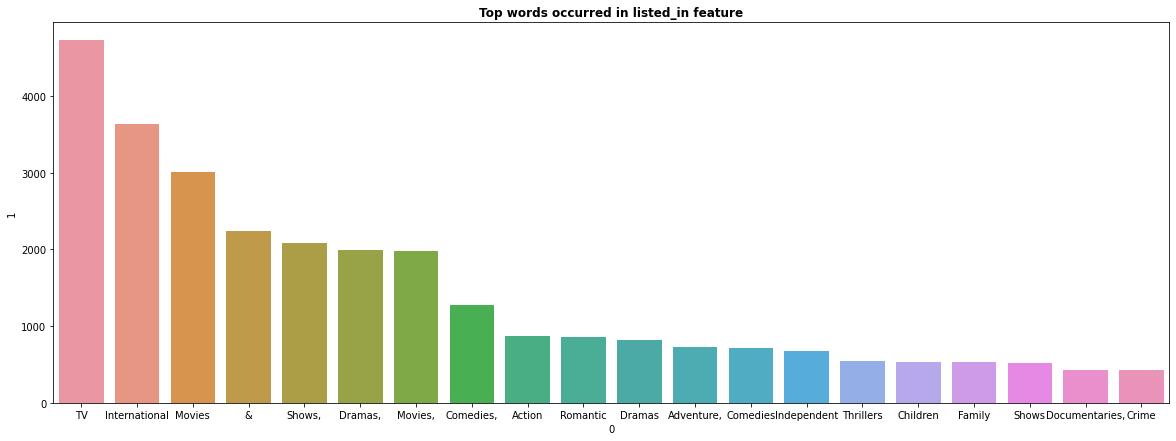

In [20]:
# plotting a bargraph
plt.figure(figsize=(20,7))
sns.barplot( top_words[0], top_words[1])
plt.title(f"Top words occurred in listed_in feature", fontweight="bold")

###Here we see top genres available throughout dataset.

## Let's analyze movie duration distribution

Text(0.5, 1.0, 'Distribution Plot of movie duration')

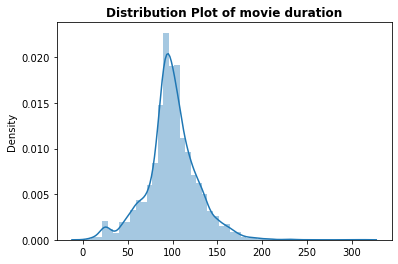

In [21]:
# plotting the distribution plot for movie timings
plt.figure(figsize=(6,4))
movie_set = net_df[ net_df['type'] == "Movie"]
time = movie_set['duration'].str.extract('(\d+)')
sns.distplot(time)
plt.title(f"Distribution Plot of movie duration", fontweight="bold")

###Movie length seems to have a normal distribution, with most of the movies having "100" min run time.

##Let's check top actors and directors.

In [22]:
# counting movies per actor storing in a dict
actors_movies = list(movie_set['cast'])
cast_record = []
for i in actors_movies:
    i=list(str(i).split(','))
    for j in i:
        cast_record.append(j.replace(' ',""))
cast_dict =Counter(cast_record)

In [23]:
# converting into dataframe for sorting
cast_df = pd.DataFrame(cast_dict, index= np.arange(0,1))

In [24]:
# sorted top cast dataframe
top_cast = cast_df.transpose().reset_index().sort_values(by=0,ascending=False)
top_cast

,index,0
142,nan,426
1051,AnupamKher,41
3115,ShahRukhKhan,35
560,NaseeruddinShah,30
1796,OmPuri,30
...,...,...
10131,BelleShouse,1
10132,DouglasTait,1
10133,MattLasky,1
10134,JenniferBlanc,1


Text(0.5, 1.0, 'Top actors with most movies')

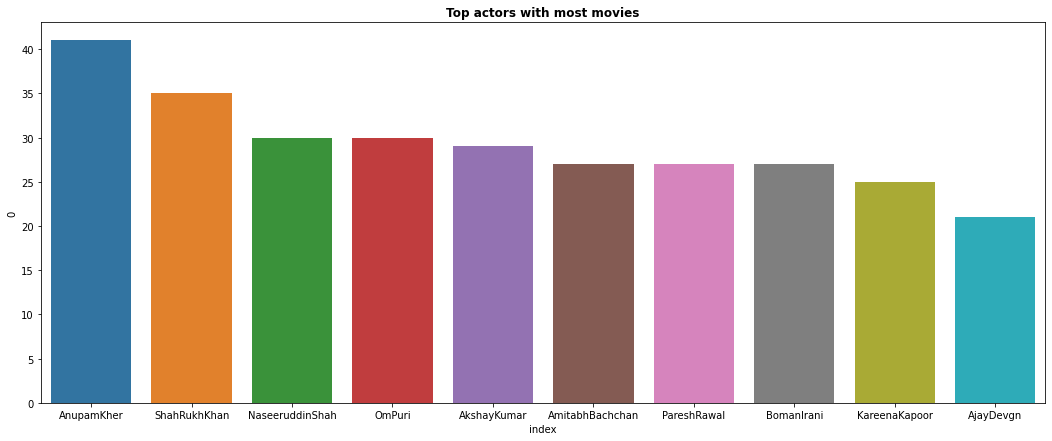

In [25]:
# plotting a bargraph of top actors
plt.figure(figsize=(18,7))
sns.barplot(top_cast["index"].iloc[1:11], top_cast[0].iloc[1:11])
plt.title(f"Top actors with most movies", fontweight="bold")

###So these are top actors who acted in most number of movies

In [26]:
# counting movies per actor storing in a dict
dir_movies = list(movie_set['director'])
dir_record = []
for i in dir_movies:
    i=list(str(i).split(','))
    for j in i:
        dir_record.append(j.replace(' ',""))
dir_dict =Counter(dir_record)

In [27]:
# converting into dataframe for sorting
dir_df = pd.DataFrame(dir_dict, index= np.arange(0,1))

In [28]:
# sorted top cast dataframe
top_dir = dir_df.transpose().reset_index().sort_values(by=0,ascending=False)
top_dir

,index,0
14,nan,163
285,JanSuter,21
284,RaúlCampos,19
411,MarcusRaboy,15
243,JayKaras,15
...,...,...
1726,SajidKhan,1
1727,LucyvanBeek,1
1728,RemiWeekes,1
1729,JenniferLynch,1


Text(0.5, 1.0, 'Top directors with most movies')

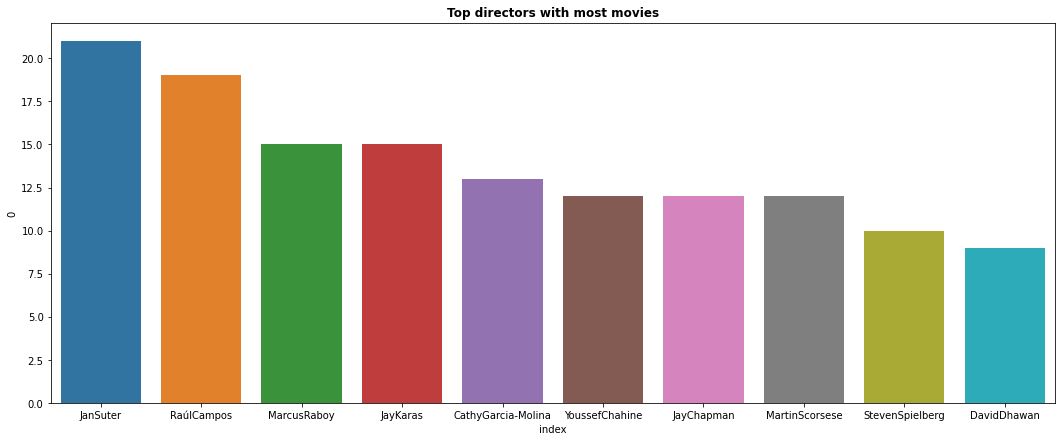

In [29]:
# plotting a bargraph of top actors
plt.figure(figsize=(18,7))
sns.barplot(top_dir["index"].iloc[1:11], top_dir[0].iloc[1:11])
plt.title(f"Top directors with most movies", fontweight="bold")

###Top directors with most movies.

# Preprocessing

###Removing stop words and punctuation from string

In [30]:
nltk.download('stopwords')
stop_w = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
# function to remove punctuation and stopwords

def string_cleaner(str):
  '''function for removing punctuation and stopwords'''

  punc_clean = re.sub(r'[^\w\s]', '', str)    # removed punctuation
  stopw_clean = [word.lower() for word in punc_clean.split() if word.lower() not in stop_w]  # removed stopwords

  return " ".join(stopw_clean)

In [32]:
# applying to "listen_in" feature to cluster on
net_df['listed_in'] = net_df['listed_in'].apply(string_cleaner)

In [33]:
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas international movies,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror movies international movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,action adventure independent movies scifi fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,dramas,A brilliant group of students become card-coun...


In [34]:
net_df.listed_in.iloc[0]

'international tv shows tv dramas tv scifi fantasy'

###Let's seperate our analysis on TV Shows and Movies.

In [35]:
# seperate on tv and movies
mov_df = net_df[net_df['type']=="Movie"]
tv_df = net_df[net_df['type']=="TV Show"]
tv_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,international tv shows tv dramas tv mysteries,A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,crime tv shows international tv shows tv dramas,"In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,crime tv shows docuseries international tv shows,Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,international tv shows tv dramas,"As a psychology professor faces Alzheimer's, h..."


### Stemming and Tokenizing

In [36]:
# initilize stemmer and tokinizing variables
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

In [37]:
# function to stem and tokenize together
def tokenize(text):
  "stemming and tokenizing"
  return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

# First we'll be clustring Movies on genres.

###Feature selection using TF-IDF vectorizer

In [38]:
# passing description arrya to stem and tolenize.
vectorizer = TfidfVectorizer(stop_words = stop_w, tokenizer = tokenize, max_features = 1000)
transform_descrip = vectorizer.fit_transform(mov_df["listed_in"])

# cheking token words
word_features = vectorizer.get_feature_names()

print(len(word_features))
print(word_features[:10]) 

25
['action', 'adventur', 'anim', 'children', 'classic', 'comedi', 'cult', 'documentari', 'drama', 'faith']


In [39]:
# all token words
fet_words = vectorizer.get_feature_names()
print(fet_words)

['action', 'adventur', 'anim', 'children', 'classic', 'comedi', 'cult', 'documentari', 'drama', 'faith', 'famili', 'fantasi', 'featur', 'horror', 'independ', 'intern', 'lgbtq', 'movi', 'music', 'romant', 'scifi', 'spiritu', 'sport', 'standup', 'thriller']


###Elbow method to get desired number of clusters

In [40]:
# using elbow method to decide numbers of clusters
ssd = []
num_of_clust = []
for i in range(1,11):
    kmeans_clust = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans_clust.fit(transform_descrip)
    ssd.append(kmeans_clust.inertia_)
    num_of_clust.append(i)

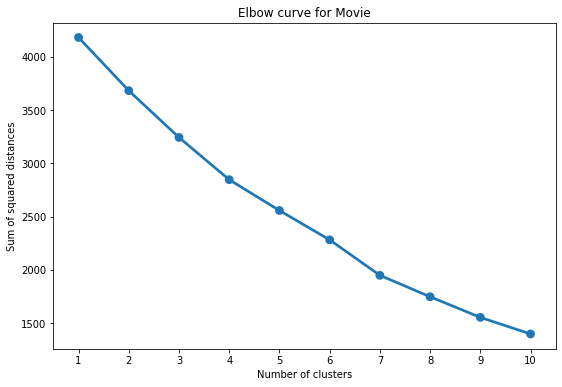

In [41]:
# plotting elbow curve
plt.figure(figsize=(9,6))
sns.pointplot(num_of_clust,ssd)
plt.title('Elbow curve for Movie')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

###It's difficult to spot a proper elbow here in the plot. We'll experiment with different clusters to have a perfect cluster number.

# Applying K-Means for Movies clustering on genres

###We'll be checking for different numbers of clusters and finalize one

In [42]:
# function plotting clusters
def plot_cluster(model):
  cluster_idices = model.fit_predict(transform_descrip)
  pca = PCA(n_components=2)
  scatter_points = pca.fit_transform(transform_descrip.toarray())

  x_axis = [a[0] for a in scatter_points]
  y_axis = [a[1] for a in scatter_points]

  plt.figure(figsize=(7,7))
  palette = {
    0: 'tab:blue',
    1: 'tab:green',
    2: 'tab:orange',
    3: 'tab:red',
    4: 'tab:cyan',
    5: 'tab:megenta'}
  sns.scatterplot(x_axis, y_axis, c="g",palette=palette, hue= cluster_idices)

### K_Means for 3 clusters

0 : comedi, action, adventur, children, famili, standup, movi, intern, scifi, fantasi, drama, thriller, music, anim, featur, cult, faith, spiritu, independ, sport, classic, romant, horror, lgbtq, documentari
1 : documentari, movi, intern, music, sport, lgbtq, classic, famili, children, spiritu, faith, action, adventur, comedi, horror, standup, cult, drama, anim, thriller, fantasi, independ, romant, scifi, featur
2 : movi, drama, intern, comedi, independ, romant, thriller, horror, music, sport, classic, lgbtq, cult, scifi, fantasi, spiritu, faith, anim, featur, documentari, famili, children, standup, adventur, action


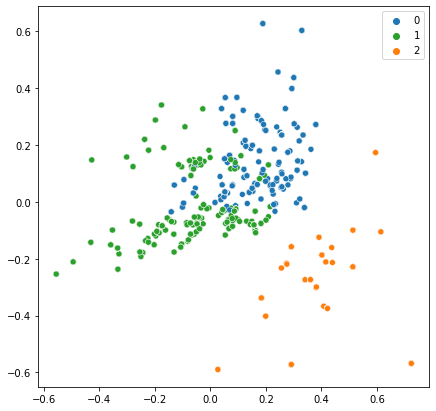

In [43]:
# K-means with 3 clusters
kmeans_3_clust = KMeans(n_clusters = 3, n_init = 20)
kmeans_3_clust.fit(transform_descrip)

# We have a look at 3 the clusters generated by k-means
common_words = kmeans_3_clust.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fet_words[word] for word in centroid))

# plotting using plot_cluster() function
plot_cluster(kmeans_3_clust)

### K_Means for 4 clusters

0 : comedi, children, famili, standup, movi, music, drama, sport, fantasi, scifi, romant, documentari, intern, featur, anim, faith, spiritu, classic, independ, adventur, action, cult, lgbtq, horror, thriller
1 : documentari, movi, intern, music, sport, lgbtq, classic, spiritu, faith, horror, cult, comedi, drama, children, anim, adventur, thriller, featur, famili, fantasi, standup, independ, romant, scifi, action
2 : movi, drama, intern, comedi, independ, thriller, romant, horror, music, sport, scifi, fantasi, classic, lgbtq, cult, spiritu, faith, anim, featur, documentari, famili, children, standup, adventur, action
3 : action, adventur, intern, movi, drama, comedi, scifi, fantasi, anim, featur, independ, classic, cult, music, horror, romant, famili, children, sport, documentari, thriller, faith, spiritu, standup, lgbtq


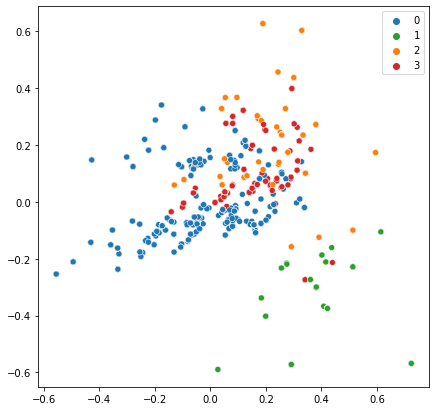

In [44]:
# K-means with 4 clusters
kmeans_4_clust = KMeans(n_clusters = 4, n_init = 50, max_iter=300, init='k-means++' )
kmeans_4_clust.fit(transform_descrip)

# We have a look at 4 the clusters generated by k-means
common_words = kmeans_4_clust.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fet_words[word] for word in centroid))


# plotting using plot_cluster() function
plot_cluster(kmeans_4_clust)

### K_Means for 5 clusters

0 : documentari, movi, intern, music, sport, lgbtq, classic, spiritu, faith, horror, cult, comedi, drama, children, anim, adventur, thriller, featur, famili, fantasi, standup, independ, romant, scifi, action
1 : movi, drama, intern, comedi, independ, thriller, romant, horror, music, sport, scifi, fantasi, classic, lgbtq, cult, spiritu, faith, anim, featur, documentari, famili, children, standup, adventur, action
2 : famili, children, movi, comedi, drama, music, sport, romant, scifi, fantasi, featur, anim, documentari, adventur, action, intern, classic, faith, spiritu, independ, cult, lgbtq, standup, horror, thriller
3 : action, adventur, intern, movi, drama, comedi, scifi, fantasi, anim, featur, independ, classic, cult, music, horror, romant, sport, documentari, thriller, famili, children, faith, spiritu, standup, lgbtq
4 : standup, comedi, music, documentari, thriller, famili, adventur, anim, children, classic, cult, drama, faith, featur, fantasi, horror, independ, intern, lgbtq, movi

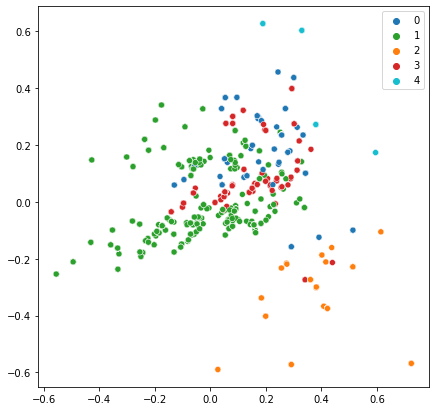

In [45]:
# K-means with 5 clusters
kmeans_5_clust = KMeans(n_clusters = 5, n_init = 20)
kmeans_5_clust.fit(transform_descrip)

# We have a look at 5 the clusters generated by k-means
common_words = kmeans_5_clust.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fet_words[word] for word in centroid))

# plotting using plot_cluster() function
plot_cluster(kmeans_5_clust)

# Second we'll be clustring Tv Shows on genres.

###Feature extraction

In [46]:
# passing description arrya to stem and tolenize.
vectorizer = TfidfVectorizer(stop_words = stop_w, tokenizer = tokenize, max_features = 1000)
transform_descrip = vectorizer.fit_transform(tv_df["listed_in"])

# cheking token words
word_features = vectorizer.get_feature_names()

print(len(word_features))
print(word_features[:10]) 

29
['action', 'adventur', 'anim', 'british', 'classic', 'comedi', 'crime', 'cult', 'docuseri', 'drama']


In [47]:
# all token words
fet_words = vectorizer.get_feature_names()
print(fet_words)

['action', 'adventur', 'anim', 'british', 'classic', 'comedi', 'crime', 'cult', 'docuseri', 'drama', 'fantasi', 'horror', 'intern', 'kid', 'korean', 'mysteri', 'natur', 'realiti', 'romant', 'scienc', 'scifi', 'seri', 'show', 'spanishlanguag', 'standup', 'talk', 'teen', 'thriller', 'tv']


###Elbow method to get desired number of clusters

In [48]:
# using elbow method to decide numbers of clusters
ssd = []
num_of_clust = []
for i in range(1,11):
    kmeans_clust = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans_clust.fit(transform_descrip)
    ssd.append(kmeans_clust.inertia_)
    num_of_clust.append(i)

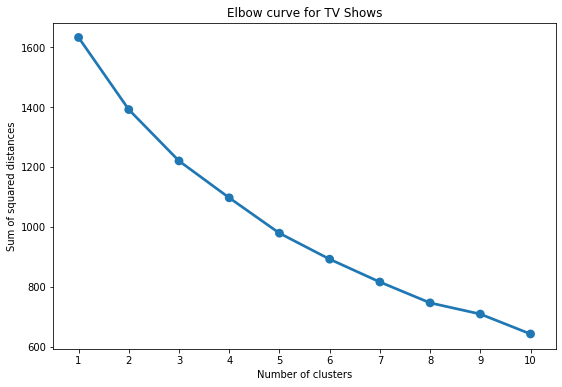

In [49]:
# plotting elbow curve
plt.figure(figsize=(9,6))
sns.pointplot(num_of_clust,ssd)
plt.title('Elbow curve for TV Shows')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

###Again it's difficult to spot a proper elbow here in the plot. We'll experiment with different clusters to have a perfect cluster number.

# Applying K-Means for Tv Shows clustering on genres

###We'll be checking for different numbers of clusters and finalize one

In [50]:
# function plotting clusters
def plot_cluster(model):
  cluster_idices = model.fit_predict(transform_descrip)
  pca = PCA(n_components=2)
  scatter_points = pca.fit_transform(transform_descrip.toarray())

  x_axis = [a[0] for a in scatter_points]
  y_axis = [a[1] for a in scatter_points]

  plt.figure(figsize=(7,7))
  palette = {
    0: 'tab:blue',
    1: 'tab:green',
    2: 'tab:orange',
    3: 'tab:red',
    4: 'tab:cyan',
    5: 'tab:megenta'}
  sns.scatterplot(x_axis, y_axis, c="g",palette=palette, hue= cluster_idices)

### K_Means for 3 clusters

0 : docuseri, show, tv, crime, natur, scienc, british, intern, realiti, spanishlanguag, comedi, mysteri, standup, talk, drama, teen, scifi, fantasi, adventur, action, kid, horror, cult, thriller, classic
1 : tv, show, intern, drama, comedi, romant, realiti, crime, anim, seri, spanishlanguag, korean, british, action, adventur, mysteri, horror, teen, fantasi, scifi, thriller, standup, talk, cult, classic
2 : kid, tv, comedi, british, korean, show, seri, anim, action, adventur, scifi, fantasi, thriller, drama, spanishlanguag, crime, cult, classic, realiti, teen, natur, scienc, standup, intern, mysteri


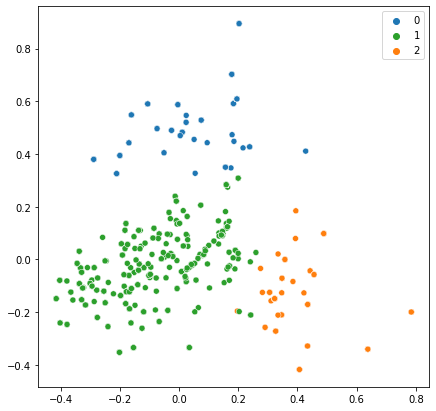

In [51]:
# K-means with 3 clusters
kmeans_3_clust = KMeans(n_clusters = 3, n_init = 20)
kmeans_3_clust.fit(transform_descrip)

# We have a look at 3 the clusters generated by k-means
common_words = kmeans_3_clust.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fet_words[word] for word in centroid))

# plotting using plot_cluster() function
plot_cluster(kmeans_3_clust)

### K_Means for 4 clusters

0 : docuseri, show, tv, crime, natur, scienc, british, intern, realiti, spanishlanguag, comedi, mysteri, standup, talk, drama, teen, scifi, fantasi, adventur, action, kid, horror, cult, thriller, classic
1 : tv, show, drama, intern, comedi, romant, realiti, crime, spanishlanguag, korean, british, action, adventur, mysteri, horror, scifi, fantasi, teen, talk, standup, thriller, cult, classic, kid, natur
2 : kid, tv, comedi, british, korean, show, action, adventur, scifi, fantasi, thriller, drama, spanishlanguag, crime, cult, classic, realiti, teen, natur, scienc, mysteri, standup, intern, romant, docuseri
3 : anim, seri, show, intern, tv, kid, teen, crime, romant, thriller, horror, spanishlanguag, adventur, action, mysteri, natur, realiti, scienc, fantasi, drama, docuseri, cult, scifi, comedi, classic


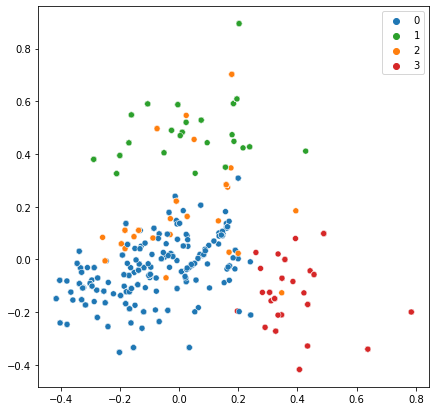

In [52]:
# K-means with 4 clusters
kmeans_4_clust = KMeans(n_clusters = 4, n_init = 20)
kmeans_4_clust.fit(transform_descrip)

# We have a look at 4 the clusters generated by k-means
common_words = kmeans_4_clust.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fet_words[word] for word in centroid))


# plotting using plot_cluster() function
plot_cluster(kmeans_4_clust)

### K_Means for 5 clusters

0 : anim, seri, show, intern, tv, kid, teen, crime, romant, thriller, horror, spanishlanguag, adventur, action, mysteri, natur, realiti, scienc, fantasi, drama, docuseri, cult, scifi, comedi, classic
1 : tv, show, drama, intern, comedi, romant, crime, spanishlanguag, korean, action, adventur, mysteri, british, horror, fantasi, scifi, teen, talk, standup, thriller, cult, classic, kid, seri, docuseri
2 : kid, tv, comedi, british, korean, show, action, adventur, scifi, fantasi, thriller, drama, spanishlanguag, cult, classic, crime, teen, mysteri, natur, standup, intern, realiti, romant, scienc, docuseri
3 : docuseri, show, tv, crime, natur, scienc, british, intern, spanishlanguag, comedi, mysteri, standup, talk, realiti, drama, scifi, fantasi, adventur, action, kid, horror, cult, thriller, romant, classic
4 : realiti, tv, show, intern, british, docuseri, romant, spanishlanguag, korean, comedi, teen, horror, scienc, natur, adventur, action, kid, thriller, crime, drama, standup, fantasi, sc

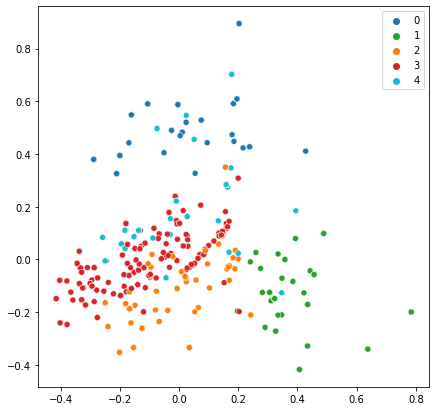

In [53]:
# K-means with 5 clusters
kmeans_5_clust = KMeans(n_clusters = 5, n_init = 20)
kmeans_5_clust.fit(transform_descrip)

# We have a look at 5 the clusters generated by k-means
common_words = kmeans_5_clust.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(fet_words[word] for word in centroid))

# plotting using plot_cluster() function
plot_cluster(kmeans_5_clust)

# Summary

* We saw that Netflix's main focus is on Movies compared to Tv Shows. With Movies accounting 69% of listings and 31% listings were Tv Shows.

* We saw what type of content is popular in different countries. Like

1.   For India, we have International Movies, Drama and Comedy movies
2.   For Canada, We have Comedy, Drama and Tv Shows.
3.   For Japan we have Anime

* Most popular Genres of all listings were

1.   Comedy
2.   Action
3.   Romance
4.   Adventure

* Movie runtime length has a normal distribution, with most of the movies having "100" min run time.

* We had a look on Top Actors and Directors where,
Top Actors were: Anupam Kher, ShahRukh Khan and Naseeruddin Shah
Top Directors were: Jan Suter, Raúl Campos, Marcus Raboy

* And finally we clustered on Genres for both Movies And TV Shows.

1.   Movie Clusters: We found 4 clusters fit well for Movies.
> Movie Genres clusters, which are
> Action and Adventure,
> Movie Drama,
> Documentary and
> Comedy

2.   List item: For TV Shows also we gound 4 clusters to be enough.
> TV Show Genres clusters, which were
> Tv Drama,
> Comedy,
> Reality and
> Documentary







# THANK YOU